In [2]:
import os
from osgeo import gdal

# --- 1. 设置输入和输出参数 ---

# 输入的100米分辨率栅格文件 (原始文件为100m，非10m)
input_raster_path = r"/nas/houce/GHSL/GHS_BUILT_S_E2030_GLOBE_R2023A_54009_100_V1_0.tif"

# 定义输出文件的路径
output_raster_path = r"/nas/houce/GHSL/GHS_BUILT_resample.tif"

# --- 2. 定义重投影和重采样的选项 ---

# 使用 gdal.WarpOptions 创建一个选项对象，更清晰
# 您也可以直接将这些作为关键字参数传入 gdal.Warp
warp_options = {
    'format': 'GTiff',                  # 输出格式为 GeoTIFF
    'srcSRS': 'ESRI:54009',             # 明确指定源CRS (Mollweide)
    'dstSRS': 'EPSG:4326',              # 目标CRS (WGS 84, 单位：度)
    'xRes': 0.25,                       # 目标X方向分辨率 (0.25度)
    'yRes': 0.25,                       # 目标Y方向分辨率 (0.25度)
    'resampleAlg': 'average',           # 重采样算法：平均值
    'dstNodata': -200,                  # 为输出文件设置一个NoData值 (GHS-BUILT-S的原始NoData值)
    'creationOptions': [
        'COMPRESS=LZW',                 # 使用LZW压缩，减小文件大小
        'TILED=YES'                     # 使用瓦片存储，提高读取效率
    ],
    'multithread': True,                # 启用多线程处理
    'warpOptions': ['NUM_THREADS=ALL_CPUS'] # 将线程数设置为所有CPU核心
}

print("开始进行重投影和重采样...")
print(f"输入文件: {input_raster_path}")
print(f"输出文件: {output_raster_path}")

# --- 3. 执行 Warp 操作 ---
try:
    # gdal.Warp() 是核心函数
    # 它会处理所有转换，包括坐标系和分辨率
    ds = gdal.Warp(output_raster_path,
                   input_raster_path,
                   **warp_options) # 使用 ** 解包字典作为关键字参数

    # 操作完成后，ds 对象为None，表示已写入磁盘
    if os.path.exists(output_raster_path):
        print("\n处理成功！")
        print(f"结果已保存至: {output_raster_path}")
    else:
        # 如果 ds 不是 None，说明可能返回了一个内存中的数据集
        # 但对于文件输出，我们检查文件是否存在
        print("\n处理可能已完成，但无法确认文件已生成。")

    # 清理（在基于文件的操作中，ds通常是None，但这是良好实践）
    ds = None

except Exception as e:
    print(f"\n处理过程中发生错误: {e}")

开始进行重投影和重采样...
输入文件: /nas/houce/GHSL/GHS_BUILT_S_E2030_GLOBE_R2023A_54009_100_V1_0.tif
输出文件: /nas/houce/GHSL/GHS_BUILT_resample.tif


Warning 1: for band 1, destination nodata value has been clamped to 0, the original value being out of range.



处理成功！
结果已保存至: /nas/houce/GHSL/GHS_BUILT_resample.tif


In [14]:
img_crop

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

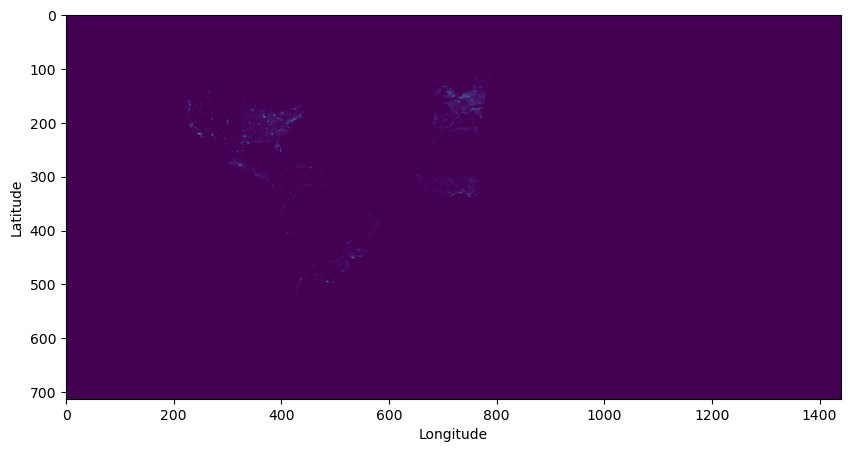

In [13]:
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt

output_raster_path = r"/nas/houce/GHSL/GHS_BUILT_resample.tif"

src = rasterio.open(output_raster_path)

img_crop = src.read(1)

plt.figure(figsize=(10, 10))
plt.imshow(img_crop, cmap='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.colorbar(label="Value")
plt.show()

In [11]:
src.bounds

BoundingBox(left=-179.9999984622411, bottom=-89.15861704558971, right=180.0000015377589, top=89.09138295441029)